<a href="https://colab.research.google.com/github/Dasha-nz/nz/blob/main/%D0%9A.%D0%9B./%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install pymorphy2 wikipedia
!pip install pymystem3
!pip install gensim matplotlib scikit-learn

In [14]:
import re

def name (текст):

    pattern = r'\b[A-ZА-ЯЁ][a-zа-яё]+\b'

    def replacement(match):
        return '***'

    text = re.sub(pattern, replacement, текст)
    return text

letter = "Здравствуйте, меня зовут Иван Иванов. Я работаю в компании ОАО Ромашка."
masked_writing = name(letter)

print(masked_writing)


***, меня зовут *** ***. Я работаю в компании ОАО ***.


In [15]:
import wikipedia
import pymorphy2

morph = pymorphy2.MorphAnalyzer()

def object(текст, старый_объект, новый_объект):

    forma = morph.parse(старый_объект)[0]


    new_forma = morph.parse(новый_объект)[0]


    new_text = текст.replace(forma.word, new_forma.word)

    return new_text


статья = wikipedia.page("Python (язык программирования)").content


new_state = object(статья, "Python", "Java")


print(new_state[:1000])


Non-English-based programming languages are programming languages that do not use keywords taken from or inspired by English vocabulary.


== Prevalence of English-based programming languages ==

The use of the English language in the inspiration for the choice of elements, in particular for keywords in computer programming languages and code libraries, represents a significant trend in the history of language design. According to the HOPL online database of languages, out of the 8,500+ programming languages recorded, roughly 2,400 of them were developed in the United States, 600 in the United Kingdom, 160 in Canada, and 75 in Australia.
Thus, over a third of all programming languages have been developed in countries where English is the primary language. This does not take into account the usage share of each programming language, situations where a language was developed in a non-English-speaking country but used English to appeal to an international audience (see the case of Python 

In [19]:
from pymystem3 import Mystem


morph_pymorphy = pymorphy2.MorphAnalyzer()
morph_mystem = Mystem()


text = "Солнечный день вдохновил на долгую прогулку по парку."


tokens = text.split()


результаты_pymorphy = {}
результаты_mystem = {}


for token in tokens:
    анализ = morph_pymorphy.parse(token)
    результаты_pymorphy[token] = анализ[0]


результаты_mystem_raw = morph_mystem.analyze(text)
for token in tokens:
    for слово in результаты_mystem_raw:
        if 'text' in слово and слово['text'] == token:
            if 'analysis' in слово and слово['analysis']:
                результаты_mystem[token] = слово['analysis'][0]

print("Результаты анализа с использованием pymorphy2:")
for токен, результат in результаты_pymorphy.items():
    print(f"{токен}: Лемма - {результат.normal_form}, Теги - {результат.tag}")

print("\nРезультаты анализа с использованием Mystem:")
for токен, результат in результаты_mystem.items():
    print(f"{токен}: Лемма - {результат['lex']}, Теги - {результат['gr']}")


различия = []
for токен in tokens:
    if токен in результаты_pymorphy and токен in результаты_mystem:
        if результаты_pymorphy[токен].normal_form != результаты_mystem[токен]['lex']:
            различия.append((токен, результаты_pymorphy[токен], результаты_mystem[токен]))

if различия:
    print("\nТокены с различиями:")
    for токен, pymorphy_result, mystem_result in различия:
        print(f"Токен: {токен}")
        print(f"Pymorphy2: Лемма - {pymorphy_result.normal_form}, Теги - {pymorphy_result.tag}")
        print(f"Mystem: Лемма - {mystem_result['lex']}, Теги - {mystem_result['gr']}")
        print("---")
else:
    print("\nНет токенов с различиями.")


Результаты анализа с использованием pymorphy2:
Солнечный: Лемма - солнечный, Теги - ADJF,Qual masc,sing,nomn
день: Лемма - день, Теги - NOUN,inan,masc sing,accs
вдохновил: Лемма - вдохновить, Теги - VERB,perf,tran masc,sing,past,indc
на: Лемма - на, Теги - PREP
долгую: Лемма - долгий, Теги - ADJF,Qual femn,sing,accs
прогулку: Лемма - прогулка, Теги - NOUN,inan,femn sing,accs
по: Лемма - по, Теги - PREP
парку.: Лемма - парку., Теги - UNKN

Результаты анализа с использованием Mystem:
Солнечный: Лемма - солнечный, Теги - A=(вин,ед,полн,муж,неод|им,ед,полн,муж)
день: Лемма - день, Теги - S,муж,неод=(вин,ед|им,ед)
вдохновил: Лемма - вдохновлять, Теги - V,пе=прош,ед,изъяв,муж,сов
на: Лемма - на, Теги - PR=
долгую: Лемма - долгий, Теги - A=вин,ед,полн,жен
прогулку: Лемма - прогулка, Теги - S,жен,неод=вин,ед
по: Лемма - по, Теги - PR=

Токены с различиями:
Токен: вдохновил
Pymorphy2: Лемма - вдохновить, Теги - VERB,perf,tran masc,sing,past,indc
Mystem: Лемма - вдохновлять, Теги - V,пе=прош,ед,

In [21]:
import gensim.downloader as api
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [22]:
model = api.load("word2vec-google-news-300")

Доступные токены в модели: ['</s>', 'in', 'for', 'that', 'is', 'on', '##', 'The', 'with', 'said']
Количество токенов: 6


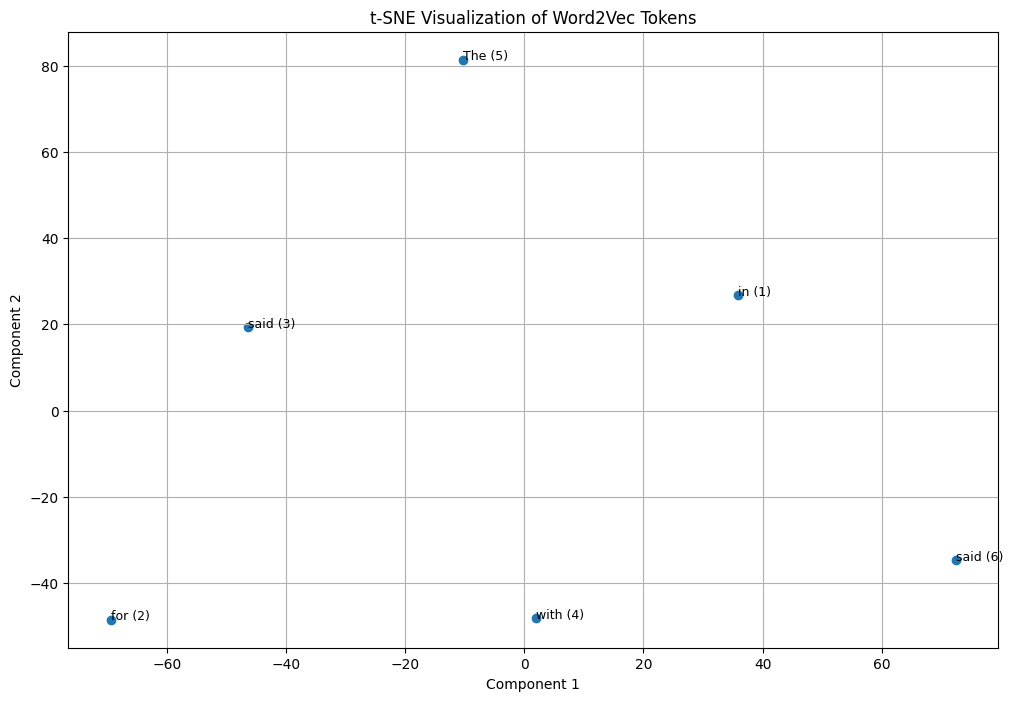

In [23]:
available_tokens = list(model.key_to_index.keys())
print(f"Доступные токены в модели: {available_tokens[:10]}")

tokens = [
    ('in', '1'),
    ('for', '2'),
    ('said', '3'),
    ('with', '4'),
    ('The', '5'),
    ('said', '6')
]


vectors = []
labels = []
for token, pos in tokens:
    if token in model.key_to_index:
        vectors.append(model[token])
        labels.append(f"{token} ({pos})")


vectors = np.array(vectors)


num_vectors = vectors.shape[0]
print(f"Количество токенов: {num_vectors}")


if num_vectors == 0:
    print("Нет доступных токенов для визуализации.")
else:

    perplexity_value = min(30, num_vectors - 1)


    tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
    reduced_vectors = tsne.fit_transform(vectors)

    plt.figure(figsize=(12, 8))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], marker='o')


    for i, label in enumerate(labels):
        plt.annotate(label, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=9)

    plt.title("t-SNE Visualization of Word2Vec Tokens")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid()
    plt.show()
